# Data Analysis procedure:
### 1. Defining the problem
### 2. Reading, understanding and cleaning data
### 3. Visualizing data
### 4. Solving the problem

# 1. Defining the problem

Sebagai data analysis di perusahaan ini saya diminta untuk menganalisa data untuk membuat strategi menaikkan sales penjualan dan membuat report dari data yang disediakan.

Untuk membuat strategi menaikkan sales penjualan saya perlu:
- Menganalisa customer segment yang tepat
- Menganalisa produk apa yang perlu kita fokuskan
- Menganalisa cara jualan yang tepat
- Menganalisa campaign yang sudah dilakukan

Untuk report data juga akan dilakukan menggunakan tableau.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from scipy.stats import f_oneway, pearsonr, chi2_contingency
import datetime

import warnings
warnings.filterwarnings("ignore")

# 2. Reading, understanding and cleaning data

Membaca file marketing campaign


In [2]:
df = pd.read_csv('marketing_campaign.csv')
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


Bisa dilihat bahwa file nya tidak terbaca sempurna. Karena ada '\t' atau tab di kolom.

Maka untuk mengakali hal ini saya memakai demiliter digunakan untuk menentukan karakter pemisah (delimiter) yang digunakan dalam file csv yang dibaca.

In [3]:
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID: nomor identifikasi unik untuk setiap customer

Year_Birth: tahun kelahiran customer

Education: tingkat pendidikan customer

Marital_Status: status pernikahan customer

Income: pendapatan tahunan customer

Kidhome: jumlah anak kecil yang tinggal bersama customer

Teenhome: jumlah anak remaja yang  tinggal bersama customer

Dt_Customer: tanggal saat customer pertama kali datang

Recency: jumlah hari sejak customer terakhir kali melakukan pembelian

MntWines: jumlah uang yang dihabiskan customer untuk membeli wine

MntFruits: jumlah uang yang dihabiskan customer untuk membeli buah-buahan

MntMeatProducts: jumlah uang yang dihabiskan customer untuk membeli produk daging

MntFishProducts: jumlah uang yang dihabiskan customer untuk membeli produk ikan

MntSweetProducts: jumlah uang yang dihabiskan customer untuk membeli produk kudapan manis

MntGoldProds: jumlah uang yang dihabiskan customer untuk membeli produk emas

NumDealsPurchases: jumlah pembelian yang dilakukan customer melalui program diskon

NumWebPurchases: jumlah pembelian yang dilakukan customer melalui website

NumCatalogPurchases: jumlah pembelian yang dilakukan customer melalui katalog

NumStorePurchases: jumlah pembelian yang dilakukan customer di toko fisik

NumWebVisitsMonth: jumlah kunjungan customer ke website per bulan

AcceptedCmp3: apakah customer pernah menerima tawaran promosi Campaign 3 atau tidak

AcceptedCmp4: apakah customer pernah menerima tawaran promosi Campaign 4 atau tidak

AcceptedCmp5: apakah customer pernah menerima tawaran promosi Campaign 5 atau tidak

AcceptedCmp1: apakah customer pernah menerima tawaran promosi Campaign 1 atau tidak

AcceptedCmp2: apakah customer pernah menerima tawaran promosi Campaign 2 atau tidak

Complain: apakah customer pernah mengajukan keluhan atau tidak

Z_CostContact: biaya untuk setiap kontak yang dilakukan dengan customer

Z_Revenue: pendapatan yang dihasilkan dari setiap kontak yang dilakukan dengan customer

Response: apakah customer memberikan respon positif terhadap tawaran promosi atau tidak

Dengan menggunakan info function ada informasi yang saya dapat dari data ini:
1. Memiliki 26 numerical variables dan 3 categorical variables
2. Terdapat 24 missing values dari variable Income

Setelah memahami data, saya mencoba untuk menambahkan beberapa variabel agar dapat memahami data dan mengungkapkan informasi lebih baik
1. Variabel Age sebagai usia dari variabel Year_Birth
2. Variabel Spending sebagai jumlah dari 6 kategori produk yang di belanjakan oleh customer
3. Variabel Marital untuk mengelompokkan status perkawinan langsung 2 kategori yaitu: 'Couple' atau 'Alone'


In [5]:
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']


df['Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

df['Marital']=df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'Couple','Together':'Couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

data1=df[['Age','Income','Spending','Marital']]
data1

,Age,Income,Spending,Marital
0,66,58138.0,1617,Alone
1,69,46344.0,27,Alone
2,58,71613.0,776,Couple
3,39,26646.0,53,Couple
4,42,58293.0,422,Couple
...,...,...,...,...
2235,56,61223.0,1341,Couple
2236,77,64014.0,444,Couple
2237,42,56981.0,1241,Alone
2238,67,69245.0,843,Couple


In [7]:
pd.options.display.float_format = "{:.2f}".format
data1.describe()

,Age,Income,Spending
count,2240.00,2216.00,2240.00
mean,54.19,52247.25,605.80
std,11.98,25173.08,602.25
min,27.00,1730.00,5.00
25%,46.00,35303.00,68.75
50%,53.00,51381.50,396.00
75%,64.00,68522.00,1045.50
max,130.00,666666.00,2525.00


Karena ada nya 24 missing values di variabel Income, saya memutuskan untuk mengisi nilai dengan mean atau median.

Untuk memutuskan antara mean atau median saya harus mengecek outlier data dan distribusi data nya terlebih dahulu

In [8]:
data1 = data1[['Age','Income','Spending']]

fig = px.box(data1.melt(), y="value", facet_col="variable",facet_col_wrap=3, boxmode="overlay",height=1000, width=1000)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.show()

Dari pengecekan outliers di atas saya menyimpulkan:
1. Age: 3 umur yang melewati Upper Fence sangat jauh maka saya menganggap ini sebagai outlier dan harus di hapus
2. Income: 2 Income yang melewati Upper Fence masih masuk akal yaitu 150-162k, berbeda dengan customer yang memiliki income 666k ini termasuk outlier dan harus di hapus
3. Spending: Hanya ada 1 spending yang melewati dan tidak terlalu jauh dari Upper Fence, sehingga tidak perlu di hapus

In [9]:
data1 = data1.drop(data1[data1['Income']> 600000].index).reset_index(drop=True)
data1 = data1.drop(data1[data1['Age']> 120].index).reset_index(drop=True)

<AxesSubplot:xlabel='Income', ylabel='Count'>

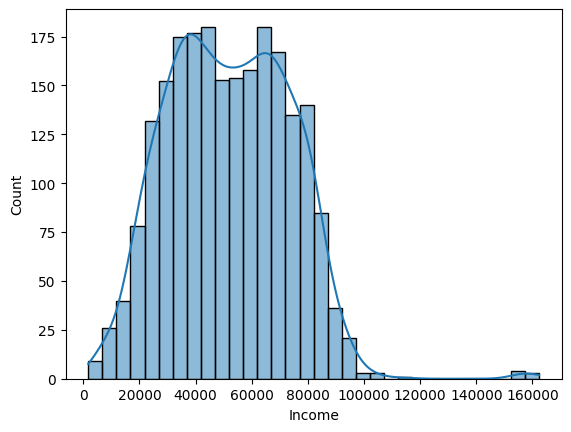

In [10]:
sns.histplot(data1['Income'], kde=True)

<AxesSubplot:xlabel='Income'>

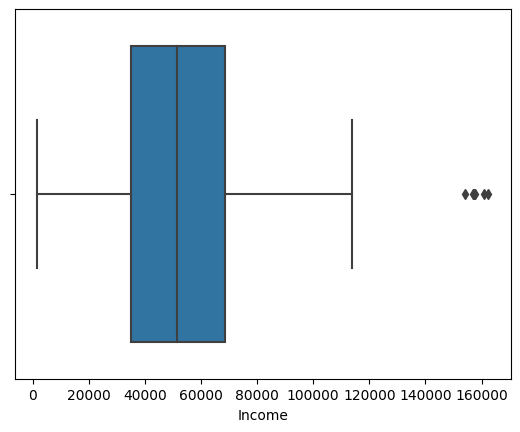

In [11]:
sns.boxplot(x=data1['Income'])

Setelah melihat histplot dan boxplot dan melihat distribusi nya right skewed saya memutuskan mengisi missing value dengan median

In [12]:
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

# 3. Data Visualisation

### Menentukan Customer Segment

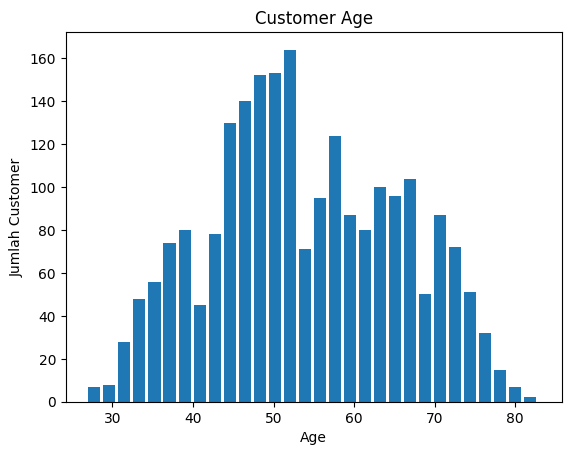

In [13]:
plt.hist(data1['Age'], bins=30, width = 1.5)

plt.title('Customer Age')
plt.xlabel('Age')
plt.ylabel('Jumlah Customer')

plt.show()

Dari jumlah customer berdasarkan Age, kita bisa lihat bin 10 sampai bin 14 memiliki jumlah Customer yang lebih banyak di banding Age yang lain.

Bin 10: 43 sampai 45 tahun, jumlah customer: 130
Bin 11: 45 sampai 47 tahun, jumlah customer: 140
Bin 12: 47 sampai 49 tahun, jumlah customer: 152
Bin 13: 49 sampai 51 tahun, jumlah customer: 153
Bin 14: 51 sampai 53 tahun, jumlah customer: 164


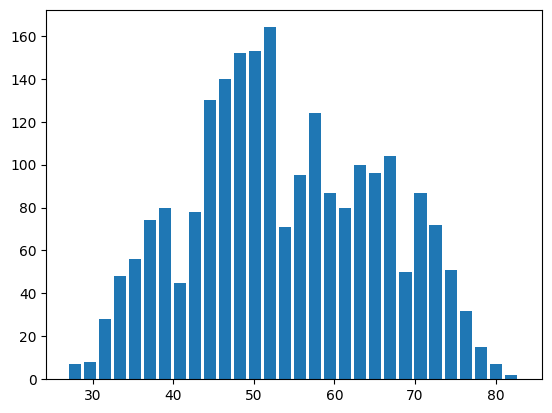

In [14]:
counts, bins, _ = plt.hist(data1['Age'], bins=30, width = 1.5)

for i in range(len(bins)-1):
    if i+1 >= 10 and i+1 <= 14:
        print("Bin {}: {} sampai {} tahun, jumlah customer: {}".format(i+1, int(bins[i]), int(bins[i+1]), int(counts[i])))

*Setelah memeriksa lebih dalam dapat disimpulkan Age 43-53 tahun adalah jumlah customer terbanyak di banding range Age yang lain.*

One-way ANOVA
F-Statistic: 27.967
p-value: 0.000


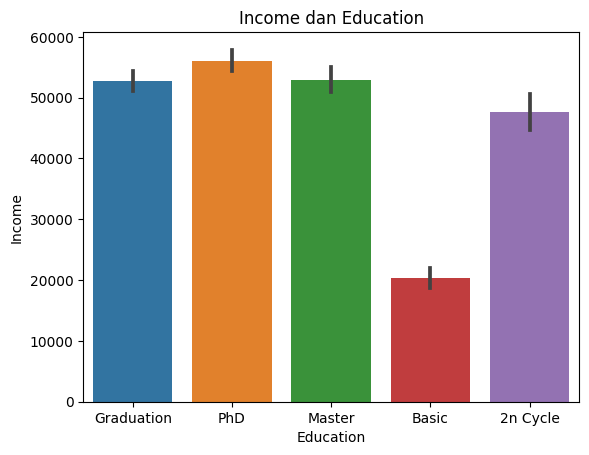

In [15]:
sns.barplot(x='Education', y='Income', data=df)
plt.title("Income dan Education")

f_statistic, p_value = stats.f_oneway(df[df['Education'] == 'Basic']['Income'],
                                      df[df['Education'] == 'Graduation']['Income'],
                                      df[df['Education'] == 'PhD']['Income'],
                                      df[df['Education'] == 'Master']['Income'],
                                      df[df['Education'] == '2n Cycle']['Income'])

print("One-way ANOVA")
print("F-Statistic: {:.3f}".format(f_statistic))
print("p-value: {:.3f}".format(p_value))

Nilai F-statistik sebesar 27.967 dan p-value sebesar 0.000, artinya terdapat perbedaan yang signifikan dalam Income tiap Education.

Ini menunjukkan bahwa pendidikan mempengaruhi Income customer secara signifikan.

Jumlah Income Graduation, PhD, Master, 2n Cycle memiliki income yang tidak terlalu berbeda. Tapi Basic memiliki income jauh di bawah yang lain.

*Maka dari itu kita bisa fokus ke customer yang memiliki Education Graduation, PhD, Master dan 2n Cycle*

Hasil T-Test Independent Samples: t-statistic = 0.8395753917355641 , p-value = 0.40123617598836525


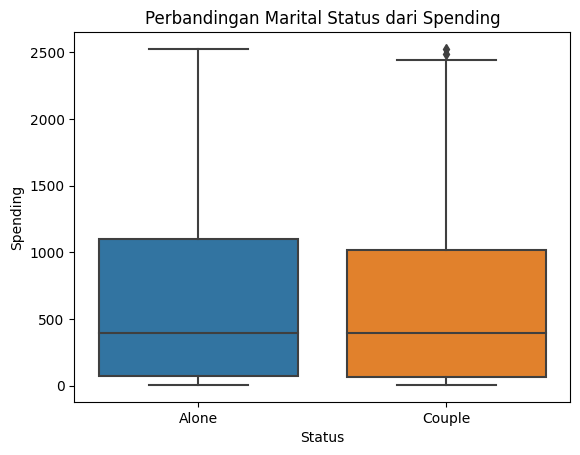

In [35]:
sns.boxplot(x='Marital', y='Spending', data=df)
plt.title("Perbandingan Marital Status dari Spending")
plt.xlabel('Status')

spending_alone = df[df['Marital'] == 'Alone']['Spending']
spending_couple = df[df['Marital'] == 'Couple']['Spending']

t_stat, p_val = stats.ttest_ind(spending_alone, spending_couple)
print('Hasil T-Test Independent Samples:', 't-statistic =', t_stat, ', p-value =', p_val)

Karena p-value lebih besar dari 0.05, maka tidak ada perbedaan yang signifikan dalam spending antara customer yang statusnya "alone" dan "couple".

Maka dari itu kita tidak perlu memasukkan kategori Marital Status sebagai pertimbangan customer segment



__Hipotesis Statement__
- HO:Tidak ada hubungan antara Income dan Spending
- HA: Ada nya hubungan antara Income dan Spending

In [17]:
Spending = df[['Spending', 'Income']]
corr, pval = stats.spearmanr(Spending[['Spending']], Spending[['Income']])

print("Correlation coefficient is %.3f." % corr)
if pval < 0.05:
    print("p-value nya %.3f maka kita menolak HO." % pval)
else:
    print("p-value nya %.3f maka kita menerima HO." % pval)

Correlation coefficient is 0.847.
p-value nya 0.000 maka kita menolak HO.


Dari hasil uji spearman, variabel Spending dan Income memiliki hubungan. Dan karena Correlation coefficient nya lebih besar dari 0.7 maka hubungan nya sangat kuat.

### Menentukan produk yang perlu difokuskan

Dari 6 produk kita perlu melihat jumlah sales tiap produk lalu di uji statistik

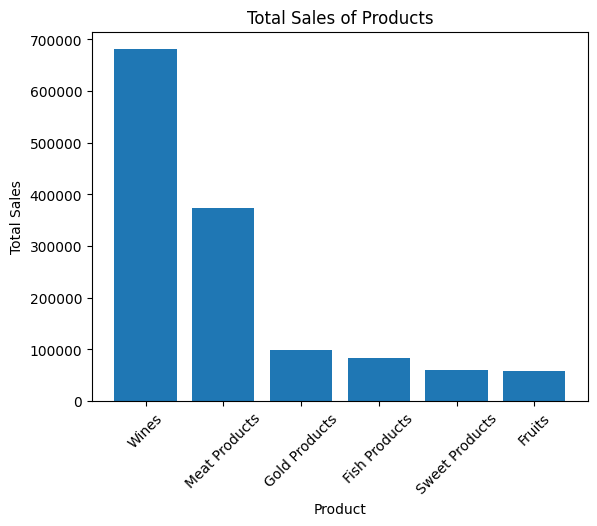

F-Statistic: 990.783
p-value: 0.000


In [37]:
data2 = [df['MntWines'].sum(), df['MntFruits'].sum(), df['MntMeatProducts'].sum(), df['MntFishProducts'].sum(), df['MntSweetProducts'].sum(), df['MntGoldProds'].sum()]
labels = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']

sorted_data, sorted_labels = zip(*sorted(zip(data2, labels), reverse=True))

plt.bar(sorted_labels, sorted_data)

plt.title('Total Sales of Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')

plt.xticks(rotation=45)

plt.show()

f_statistic, p_value = f_oneway(df['MntWines'], df['MntFruits'], df['MntMeatProducts'], df['MntFishProducts'], df['MntSweetProducts'], df['MntGoldProds'])

print("F-Statistic: {:.3f}".format(f_statistic))
print("p-value: {:.3f}".format(p_value))

- Nilai F-statistic sebesar 990.783 menunjukkan bahwa ada perbedaan yang signifikan antara produk.
- P-value yang kurang dari 0.05 juga menunjukkan adanya perbedaan yang signifikan antara setidaknya dua kelompok dalam sampel.

Dapat disimpulkan bahwa betul ada perbedaan yang signifikan antara total penjualan produk antara Wines, Fruits, Meat Products, Fish Products, Sweet Products, dan Gold Products.
Dilihat dari bar plot pun sudah jelas bahwa Wines dan Meat Products adalah 2 produk yang memiliki sales tertinggi.
Maka kita bisa fokus kepada 2 produk ini

### Menganalisa purchases

Memvisualkan 4 purchases lalu di uji statistik

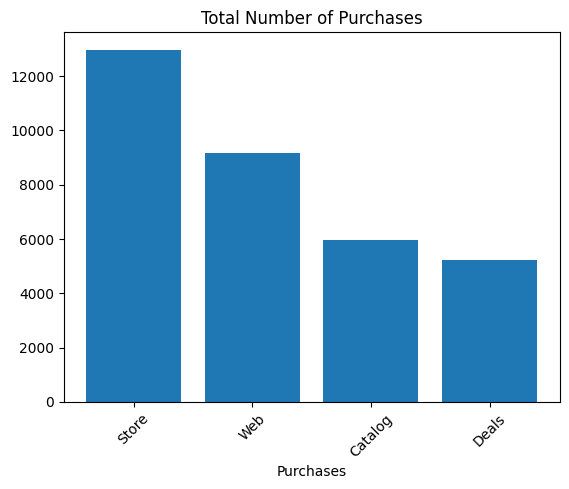

In [45]:
data3 = [df['NumDealsPurchases'].sum(), df['NumWebPurchases'].sum(), df['NumCatalogPurchases'].sum(), df['NumStorePurchases'].sum()]
labels = ['Deals', 'Web', 'Catalog', 'Store']

sorted_data, sorted_labels = zip(*sorted(zip(data3, labels), reverse=True))

plt.bar(sorted_labels, sorted_data)

plt.title('Total Number of Purchases')
plt.xlabel('Purchases')

plt.xticks(rotation=45)

plt.show()

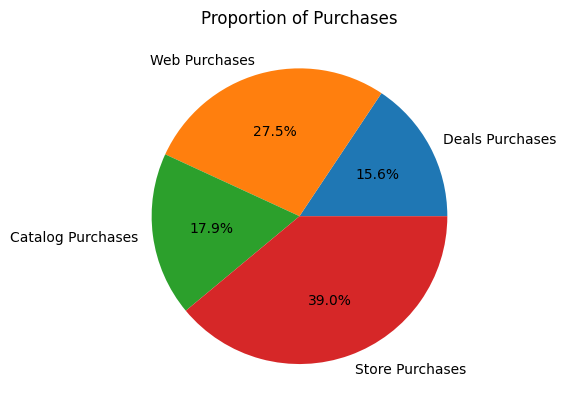

F-Statistic: 731.221
p-value: 0.000


In [46]:
labels = ['Deals Purchases', 'Web Purchases', 'Catalog Purchases', 'Store Purchases']

plt.pie(data3, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Purchases')
plt.show()

f_statistic, p_value = f_oneway(df['NumStorePurchases'], df['NumWebPurchases'], df['NumCatalogPurchases'], df['NumDealsPurchases'])

print("F-Statistic: {:.3f}".format(f_statistic))
print("p-value: {:.3f}".format(p_value))

- Nilai F-statistic sebesar 731.221 menunjukkan bahwa ada perbedaan yang signifikan antara produk.
- P-value yang kurang dari 0.05 juga menunjukkan adanya perbedaan yang signifikan antara setidaknya dua kelompok dalam sampel.

Berdasarkan gambar barplot dan pie chart yang telah dihasilkan, terlihat bahwa channel pembelian yang paling banyak dilakukan oleh pelanggan adalah melalui toko fisik (store) dengan persentase sebesar 39%. Kemudian diikuti oleh pembelian melalui website (web purchases) sebesar 27.5%. Sedangkan pembelian melalui penawaran khusus (deals) memiliki persentase sebesar 15.6% dan pembelian melalui katalog (catalog) memiliki persentase sebesar 17.9%. Oleh karena itu, strategi pemasaran yang efektif dapat berfokus pada meningkatkan penjualan melalui Store dan Web purchases.

### Menganalisa campaign

Memvisualkan accepted campaign percentage dan accepted campaign dengan response

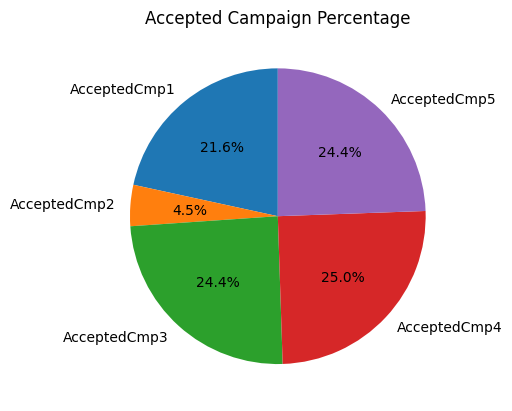

In [69]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
accepted = df[campaigns].sum()
response = df['Response'].value_counts()

total_accepted = accepted.sum()
campaign_percent = round((accepted/total_accepted)*100,2)
response_percent = round((response/response.sum())*100,2)

plt.pie(campaign_percent, labels=campaigns, autopct='%1.1f%%', startangle=90)
plt.title('Accepted Campaign Percentage')
plt.show()


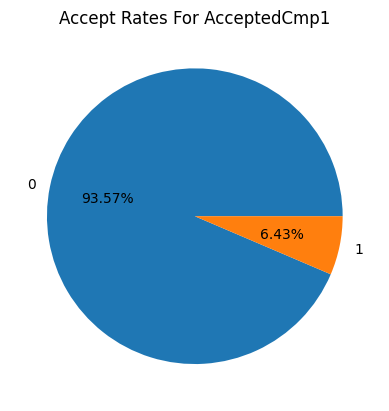

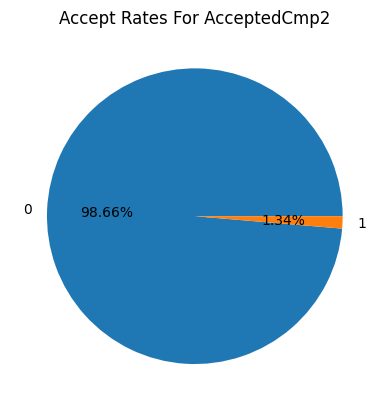

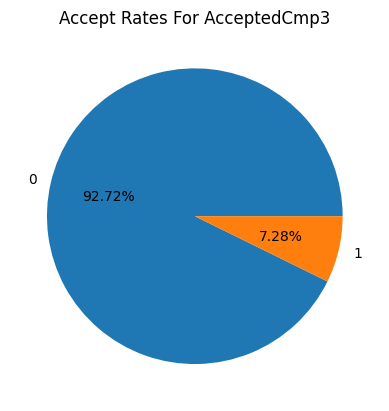

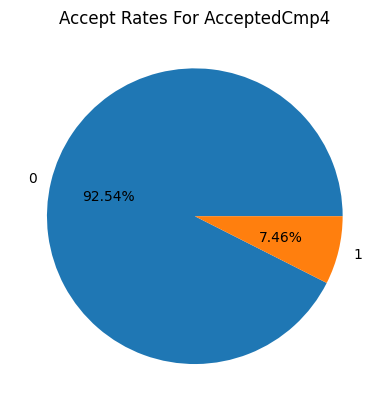

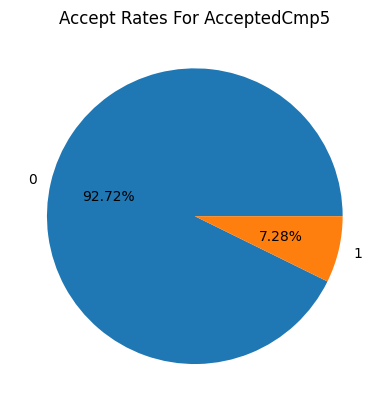

AcceptedCmp1 and Response=0
Chi-square Statistic: 190.2417825877792
p-value: 2.815498494500291e-43

AcceptedCmp1 and Response=1
Chi-square Statistic: 190.2417825877792
p-value: 2.815498494500291e-43

AcceptedCmp2 and Response=0
Chi-square Statistic: 60.13029715852822
p-value: 8.878117846243345e-15

AcceptedCmp2 and Response=1
Chi-square Statistic: 60.13029715852822
p-value: 8.878117846243345e-15

AcceptedCmp3 and Response=0
Chi-square Statistic: 142.07488385704775
p-value: 9.364995605427315e-33

AcceptedCmp3 and Response=1
Chi-square Statistic: 142.07488385704775
p-value: 9.364995605427315e-33

AcceptedCmp4 and Response=0
Chi-square Statistic: 68.31245605996764
p-value: 1.3953678043411643e-16

AcceptedCmp4 and Response=1
Chi-square Statistic: 68.31245605996764
p-value: 1.3953678043411643e-16

AcceptedCmp5 and Response=0
Chi-square Statistic: 235.46774912127177
p-value: 3.8280454367522022e-53

AcceptedCmp5 and Response=1
Chi-square Statistic: 235.46774912127177
p-value: 3.82804543675220

In [68]:
for i in campaigns:
    accept_rate = (df.groupby(i).size() / df[i].count()) * 100
    plt.title(f"Accept Rates For {i}")
    plt.pie(accept_rate, labels=df[i].unique(), autopct='%1.2f%%')
    plt.show() 

contingencies = []
for i in range(1, 6):
    for j in range(2):
        contingency = pd.crosstab(df[f'AcceptedCmp{i}'], df['Response'].apply(lambda x: int(x==j)))
        contingencies.append(contingency)

for i, contingency in enumerate(contingencies):
    cmp_num = i // 2 + 1
    response_val = i % 2
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    print(f"AcceptedCmp{cmp_num} and Response={response_val}")
    print("Chi-square Statistic:", chi2)
    print("p-value:", p_value)
    print("")

Berdasarkan hasil uji statistik Chi-Square, dapat disimpulkan bahwa ada hubungan yang signifikan antara setiap Campaign dengan Response. Hal ini dapat dilihat dari nilai p-value yang sangat kecil (kurang dari 0.05) pada setiap uji statistik, sehingga dapat menolak hipotesis nol yang menyatakan bahwa tidak ada hubungan antara variabel tersebut.

Oleh karena itu, dapat dikatakan bahwa Campaign berpotensi mempengaruhi Response, perusahaan dapat mempertimbangkan campaign yang efektif untuk meningkatkan respons pelanggan.

# 4. Solving the problem

Setelah melakukan visualisasi data saya menyimpulkan:
1. Customer Segment: Fokus pada customer segment yang paling banyak jumlahnya yaitu customer dengan usia 43-53 tahun dan pendidikan PhD, Master, 2n Cycle, dan Graduation karena memiliki pendapatan yang tinggi.
2. Produk Unggulan: Fokus pada produk Wines dan Meat yang memiliki persentase pembelian yang tinggi.
3. Cara Jualan: Fokus pada Store Purchases dan Web Purchases yang memiliki jumlah pembelian yang tinggi.
4. Analisis Campaign: Menemukan bahwa campaign dapat meningkatkan jumlah response, tetapi tidak ada perbedaan yang signifikan antara Campaign 1, 3, 4, dan 5.

Maka *Insight* untuk perusahaan:
1. Personalization: Menggunakan customer segment untuk membuat pesan dan tawaran yang lebih relevan dan personal untuk segmen pelanggan perusahaan.
2. Marketing Channel: Pilih channel marketing yang paling efektif untuk mencapai Customer contoh seperti email, media sosial, atau iklan online
3. Developing product and services: Upaya mengembangkan produk dan layanan kita sesuai dengan kebutuhan dan preferensi Customer Segment
4. Loyalty Program: Buat program loyalitas sesuai Customer Segment untuk meningkatkan Retency atau repeat order dari Customer
5. Influencer: Cari influencer yang terkait dengan produk Wine dan Meat, dan gunakan mereka untuk mempromosikan produk kita. Pastikan mereka memiliki audiens yang relevan dengan 2 produk kita
6. Event or Expo: Ikuti acara expo atau event yang terkait dengan produk kita bukan hanya untuk jualan tapi untuk memperkenalkan produk kita (Brand Awareness) kepada lebih banyak orang atau bisa juga membangun jaringan bisnis
7. Branding: Fokus branding terhadap 2 produk kita ini untuk membangun Brand Awareness
8. Offline Promotion: Lakukan promosi offline atau langsung di toko fisik seperti pemasangan brosur atau iklan di tempat umum seperti stasiun atau pusat perbelanjaan untuk meningkatkan visibilitas toko fisik kita
9. Digital Marketing: Lakukan Marketing online secara teratur kepada pelanggan Anda untuk memberi tahu mereka tentang produk unggulan, Deals khusus, Catalog kita dan informasi terbaru tentang toko Anda.
10. Campaign: Menginvestigasi Campaign 2 karena angkanya sangat rendah dibandingkan dengan campaign lainnya. Tetap melakukan campaign 1, 3, 4, dan 5 karena persentasenya mirip dan menunjukkan konsistensi.
